In [1]:
from sklearn.decomposition import SparsePCA
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from librosa import core
import librosa
import librosa.display
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import matplotlib

from pandas.plotting import parallel_coordinates
matplotlib.style.use('ggplot')


%matplotlib inline

In [31]:
x_y_first_hand_crafted = pd.read_pickle("dataset/x_y_first_hand_crafted.pkl")
x_y_sample_hand_crafted = pd.read_pickle("dataset/x_y_sample_hand_crafted.pkl")
x_y_sample_network_learned = pd.read_pickle("dataset/x_y_sample_network_learned.pkl")

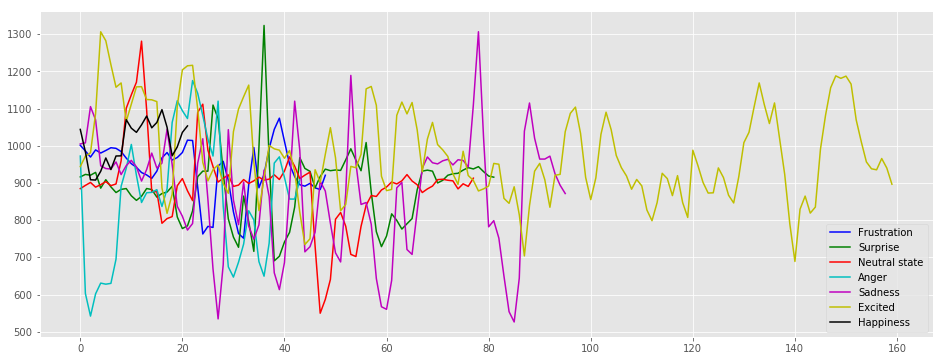

In [3]:
color_codes = ['b','g','r','c','m','y','k']
legend_handles = []

plt.figure(figsize=[16,6])
for c, (index, series) in enumerate(x_y_first_hand_crafted.iterrows()):
    l_h, = plt.plot(series.spectral_bw.ravel(), color_codes[c], label = series.emotion )
    legend_handles.append(l_h)
plt.legend(handles=legend_handles)
#x_y_first_hand_crafted.spectral_bw[0]

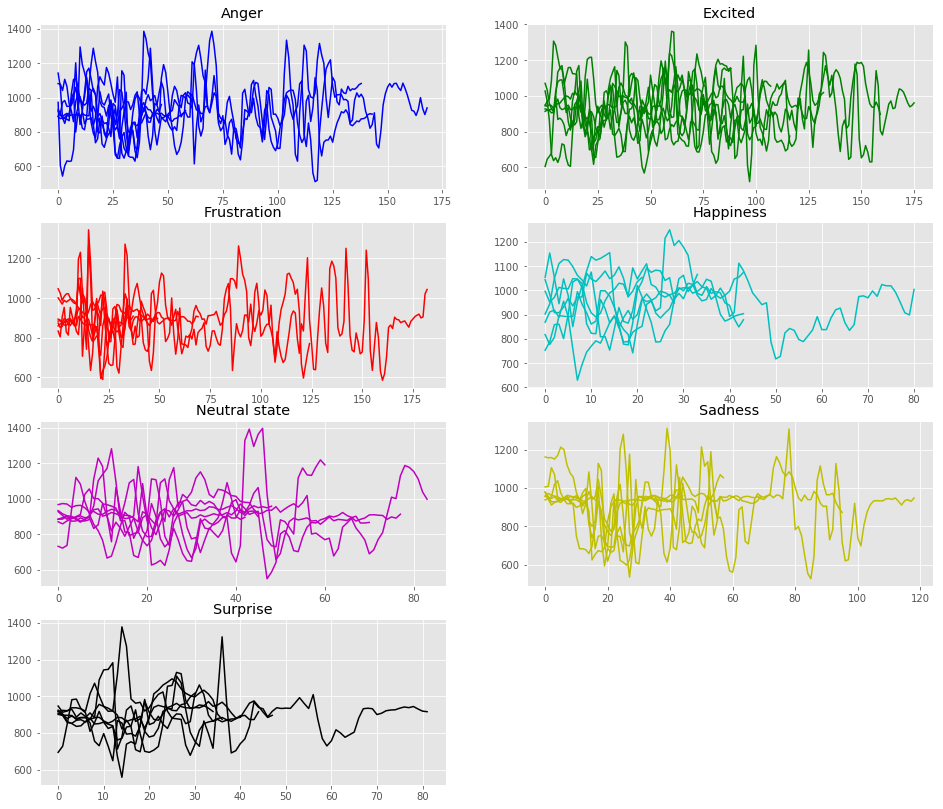

In [4]:
sub_plots = 1
x_y_last_grp = x_y_sample_hand_crafted.groupby(by='emotion')
plt.figure(figsize=[16,14])

for c, (name, group) in enumerate(x_y_last_grp):
    color_codes = ['b','g','r','c','m','y','k']
    plt.subplot(420+sub_plots)
    sub_plots += 1
    for index, series in group.iterrows():
        l_h, = plt.plot(series.spectral_bw.ravel(), color_codes[c], label = series.emotion )
        legend_handles.append(l_h)
    
    plt.title(name)
    #plt.legend(handles=legend_handles)

In [5]:
def plot_spec(y, sr = 16000, plot_num = 1, emotion=""):
    
    
    plt.figure(plot_num+1, figsize=(12, 8))
    #plt.subplot(4, 2, 1)
    
    # Visualize an STFT power spectrum
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    
    # Or on a logarithmic scale

    
    librosa.display.specshow(D, y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log-frequency power spectrogram ' + emotion)

    
def plot_spec_comb(y, sr = 16000, plot_num = 1, emotion=""):

    plt.figure(plot_num)
    C = librosa.feature.chroma_cqt(y=y, sr=sr, n_chroma=5)
    tempo, beat_f = librosa.beat.beat_track(y=y, sr=sr, trim=False)
    beat_f = librosa.util.fix_frames(beat_f, x_max=C.shape[1])
    Csync = librosa.util.sync(C, beat_f, aggregate=np.median)
    beat_t = librosa.frames_to_time(beat_f, sr=sr)
    ax1 = plt.subplot(2,1,1)
    librosa.display.specshow(C, y_axis='chroma', x_axis='time')
    plt.title('Chroma (linear time)')
    ax2 = plt.subplot(2,1,2, sharex=ax1)
    librosa.display.specshow(Csync, y_axis='chroma', x_axis='time',
                             x_coords=beat_t)
    plt.title('Chroma (beat time)')
    plt.tight_layout()


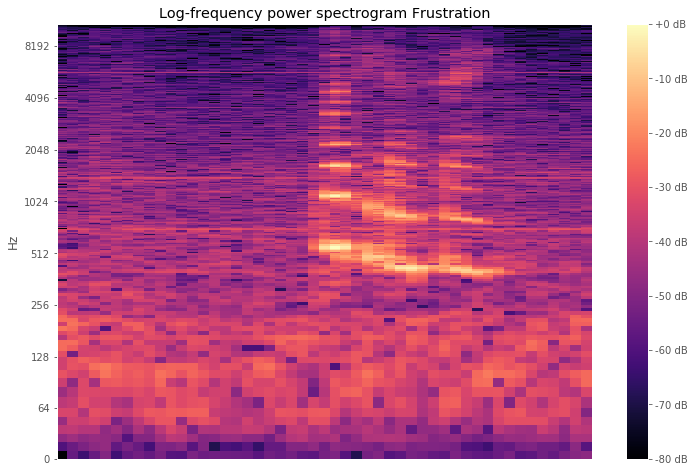

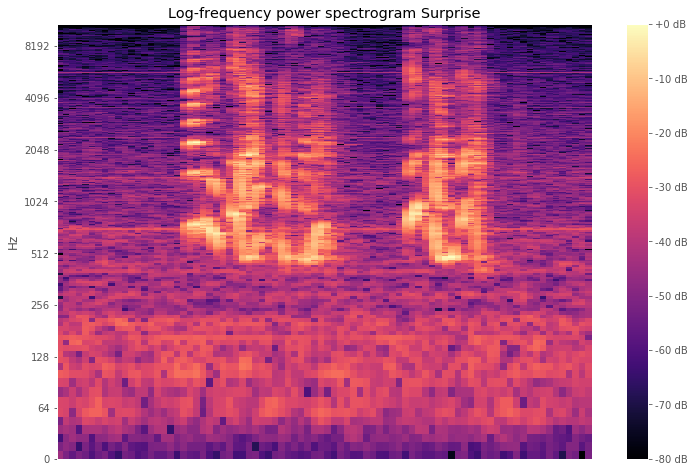

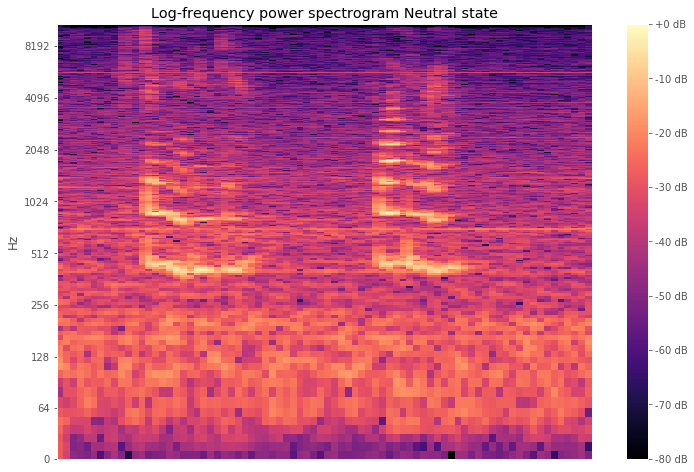

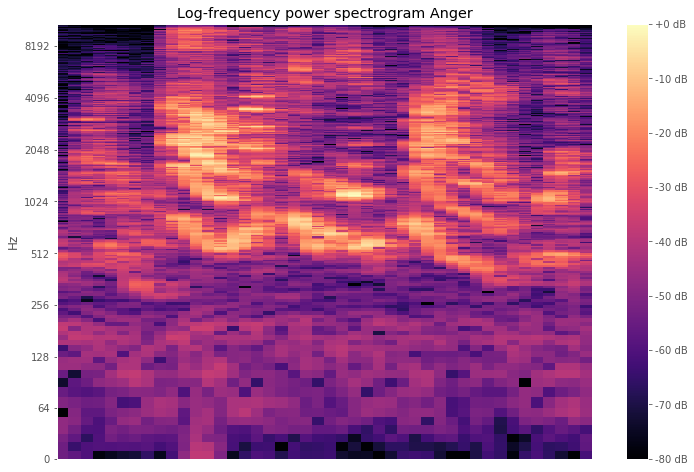

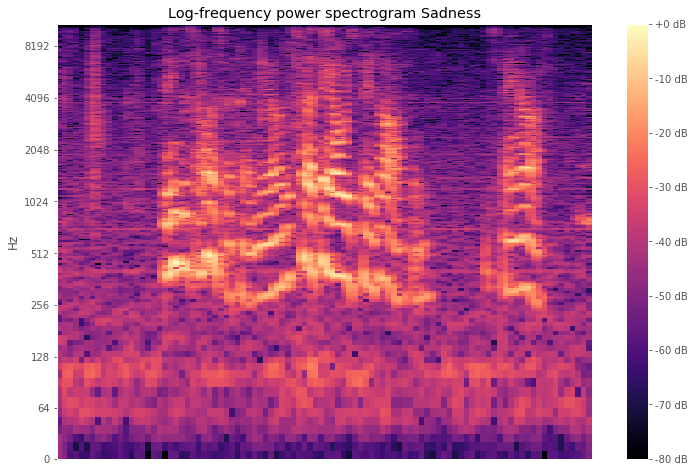

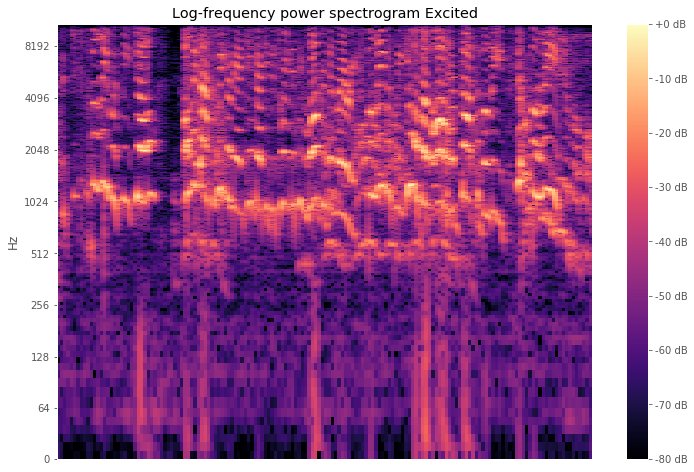

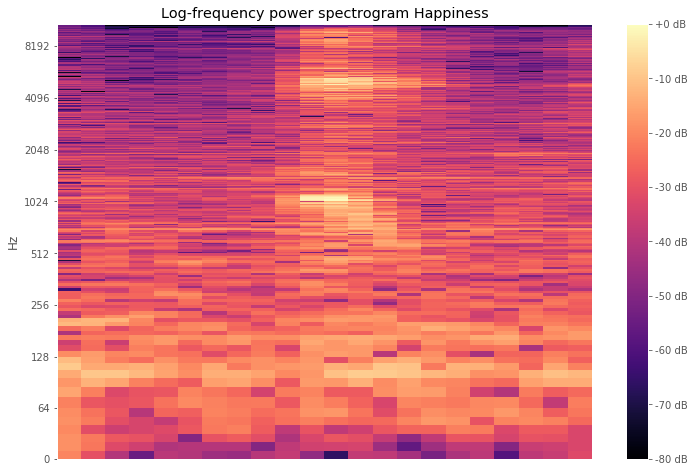

In [6]:
for count, (index, series) in enumerate(x_y_first_hand_crafted.iterrows()):
    plot_spec(series.sigs.ravel(),plot_num = count+1, emotion=series.emotion)

In [7]:
#for count, (index, series) in enumerate(x_y_first.iterrows()):
#    plot_spec_comb(series.sigs.ravel(),plot_num = count+1, emotion=index)

/home/ritesh_malaiya/anaconda3/envs/p3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


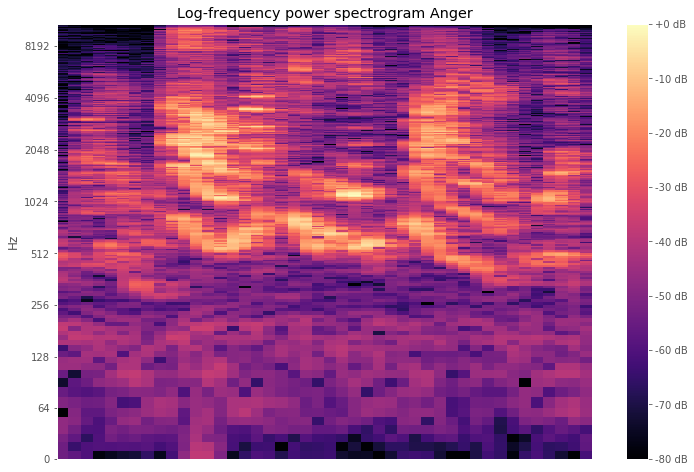

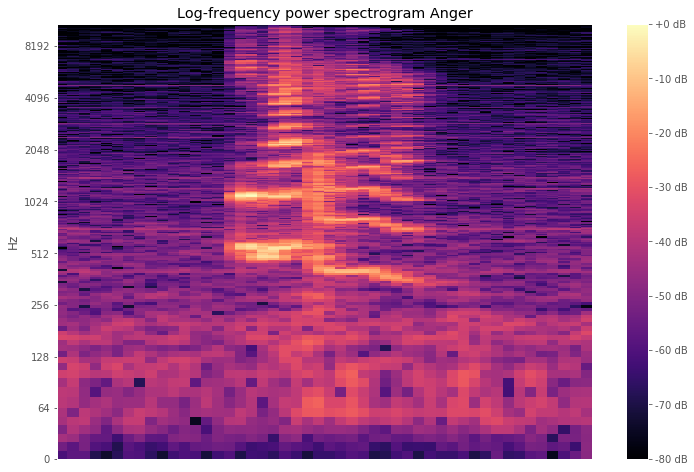

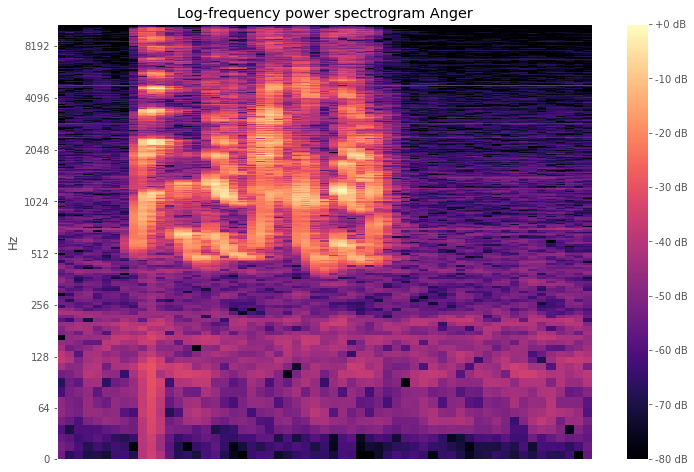

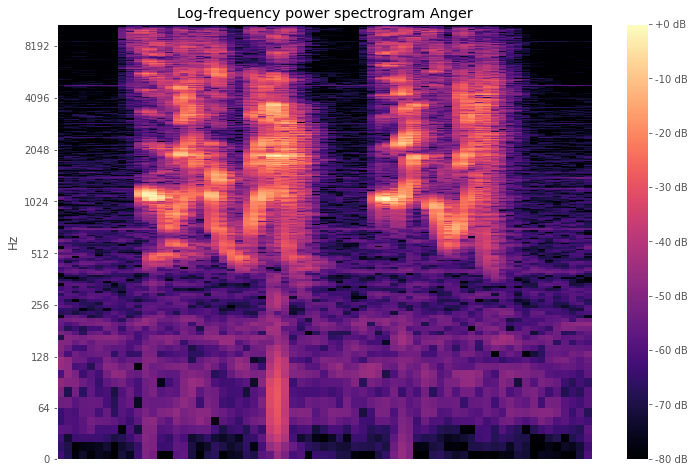

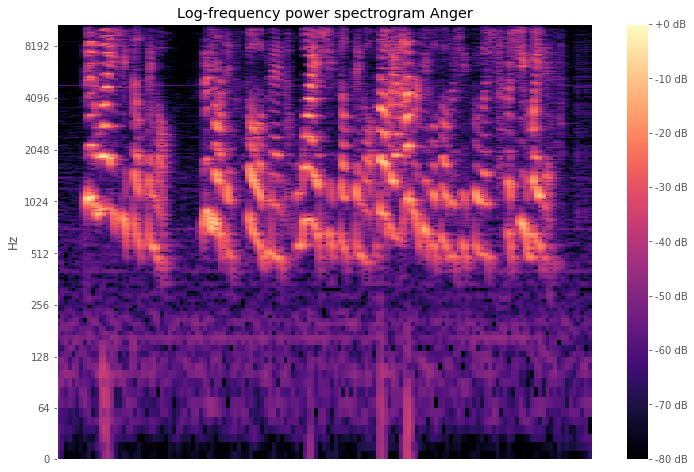

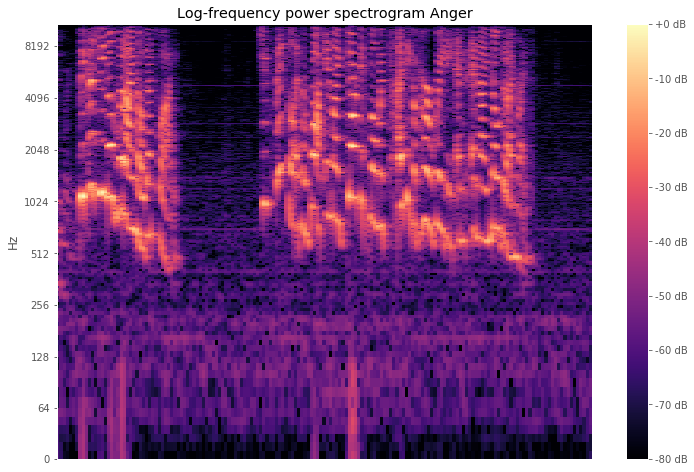

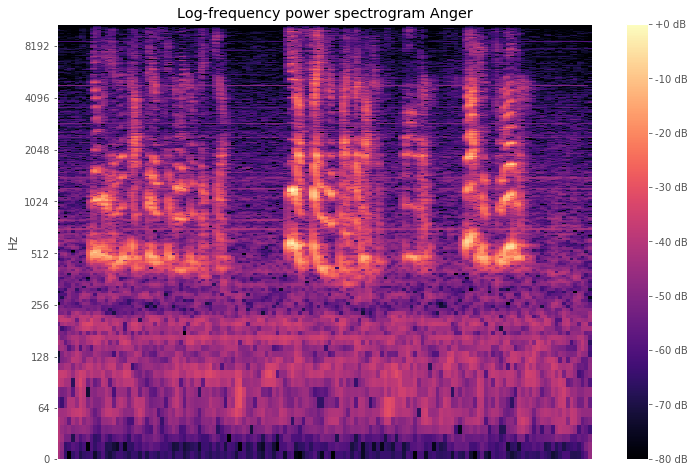

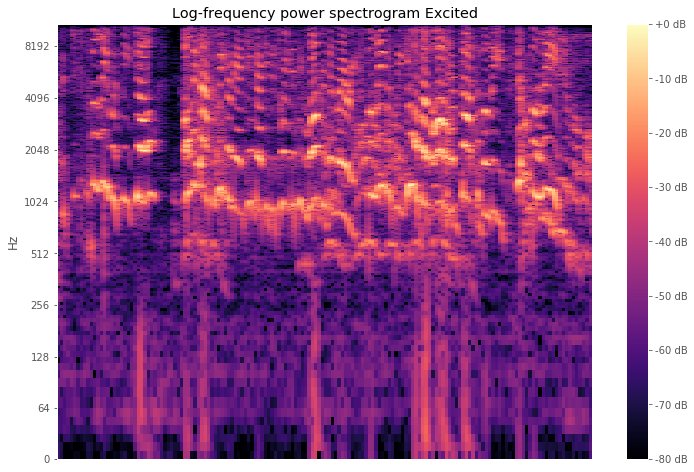

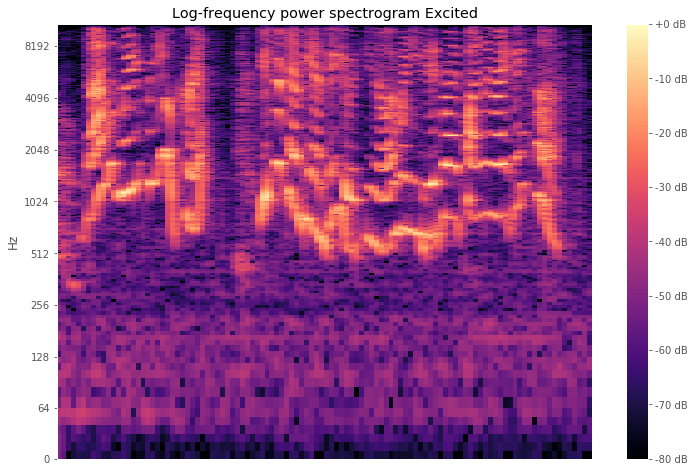

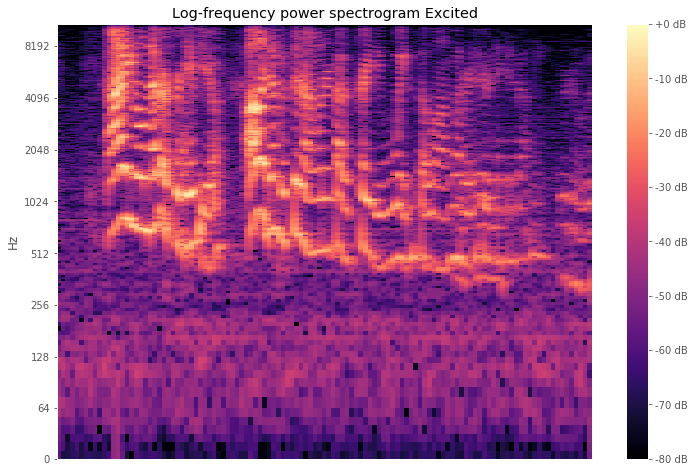

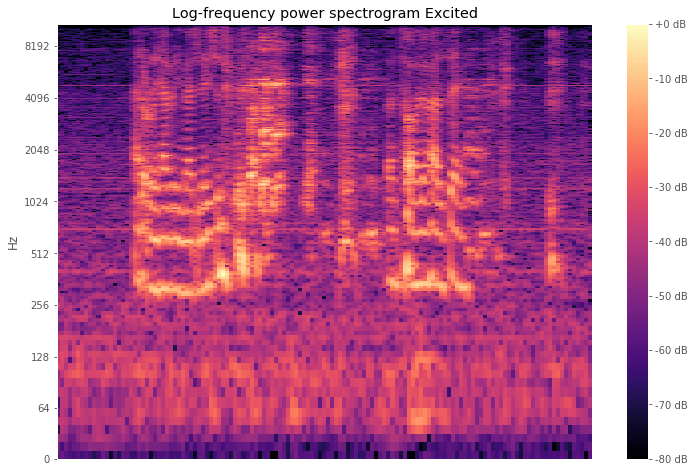

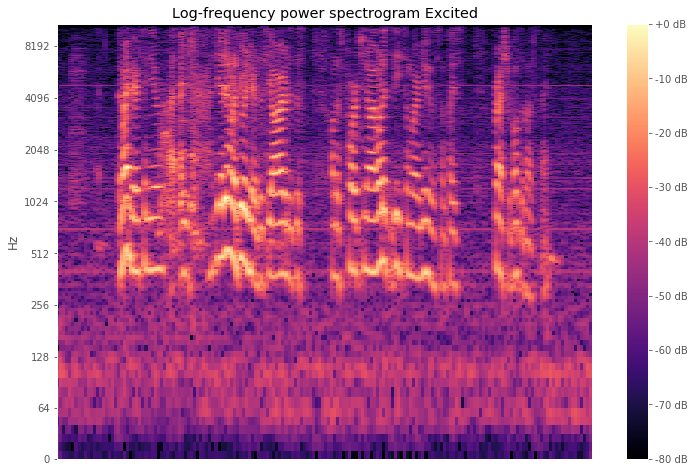

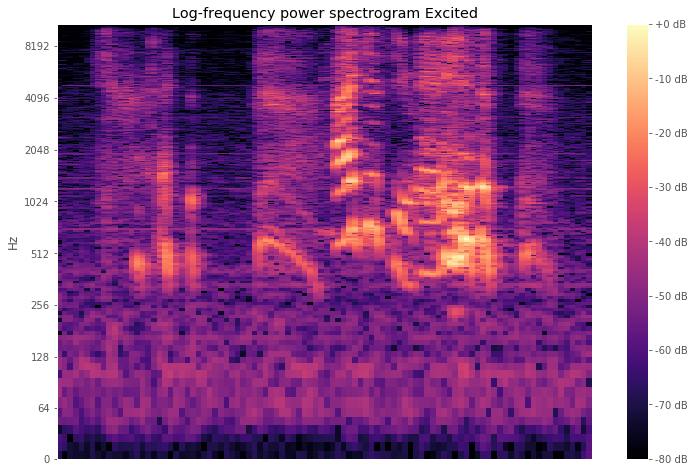

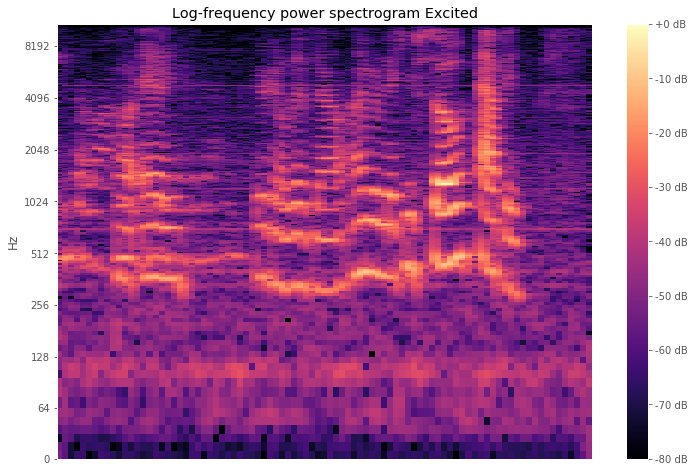

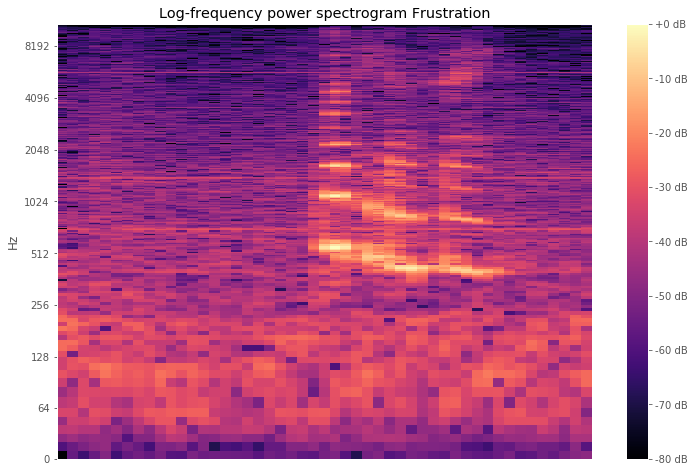

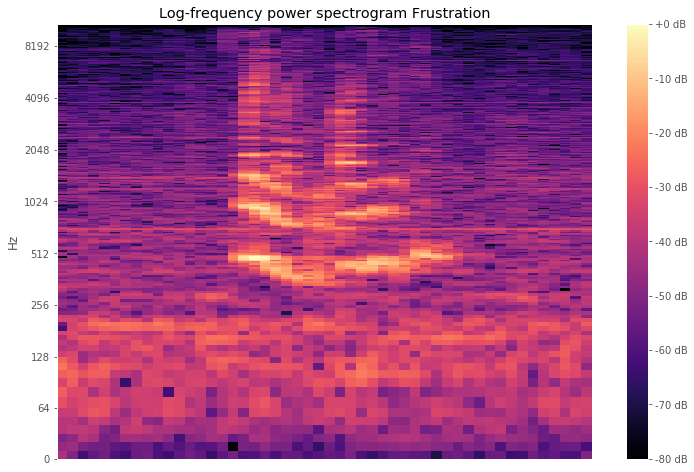

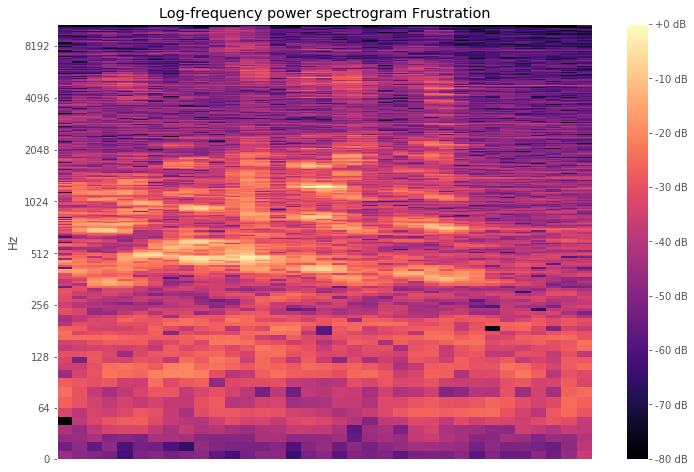

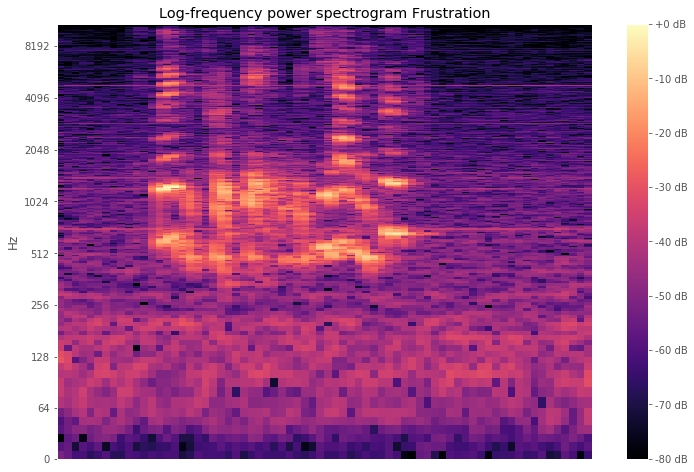

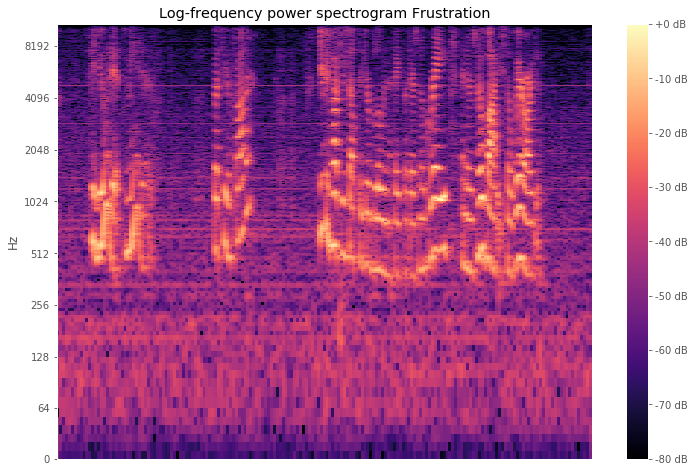

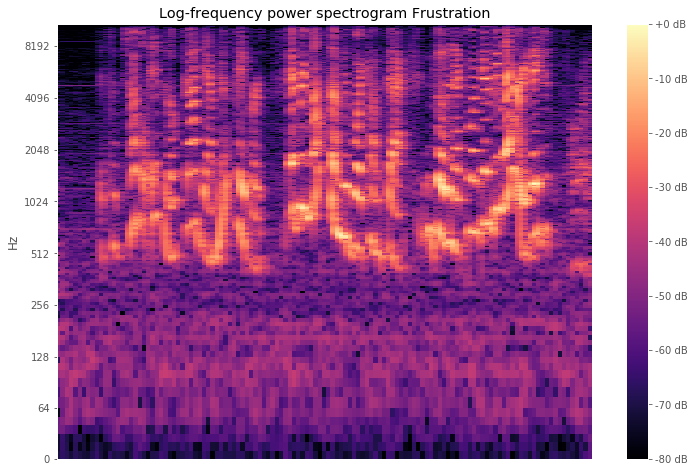

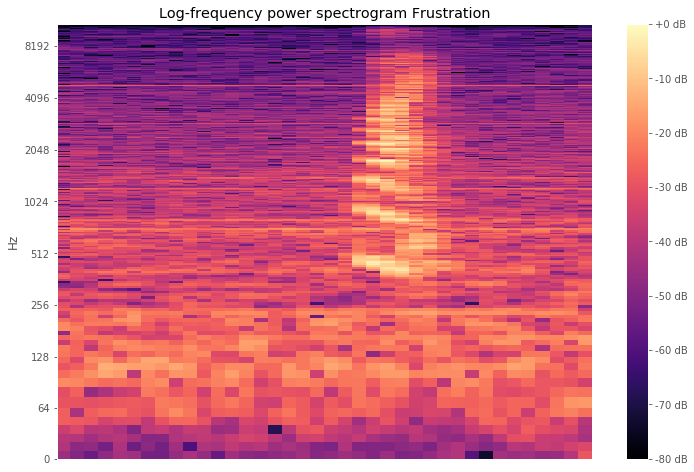

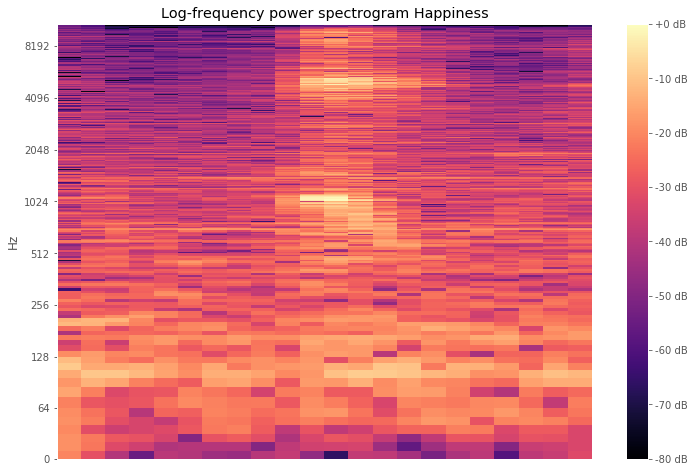

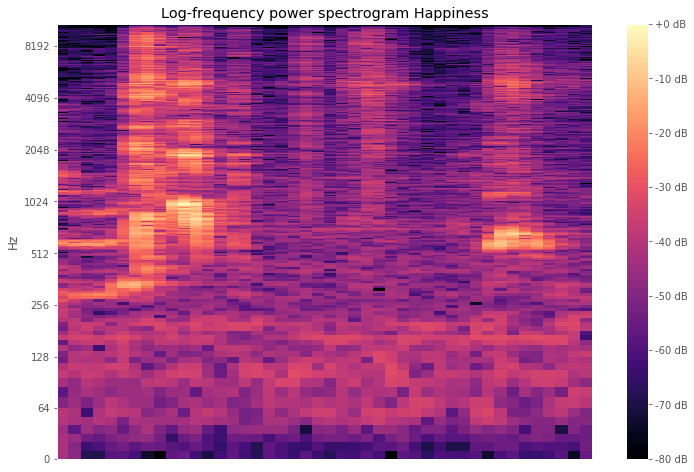

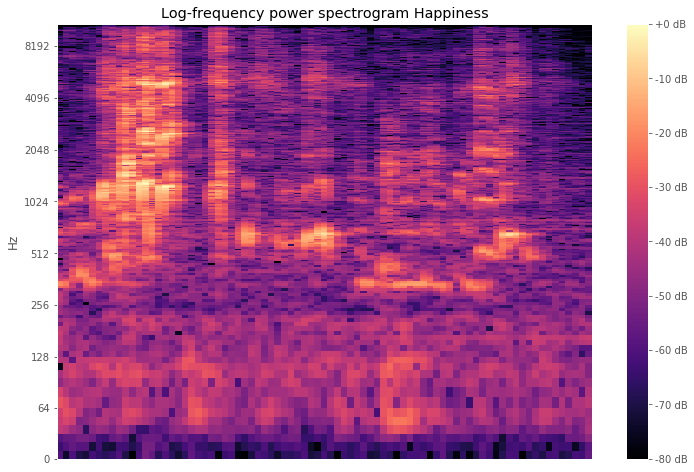

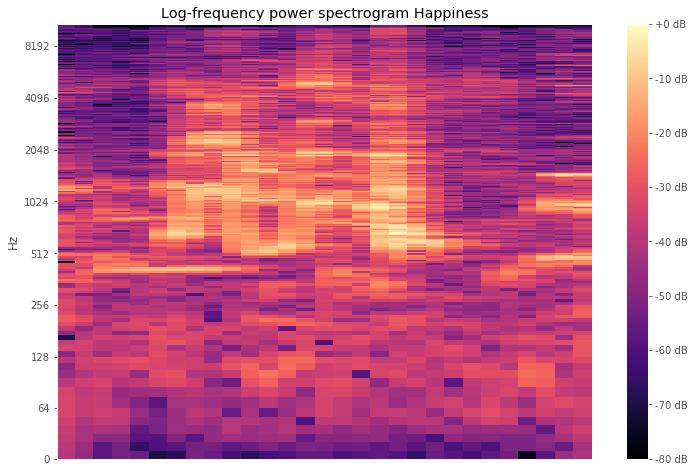

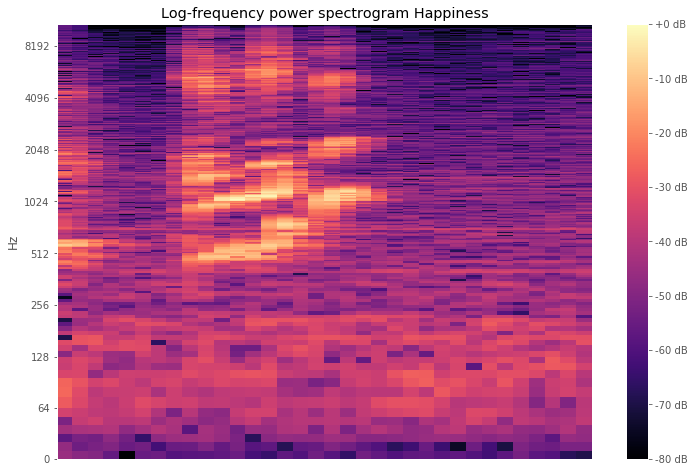

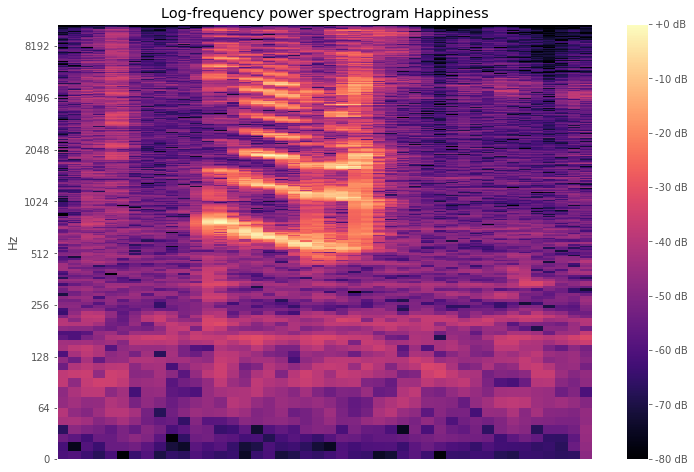

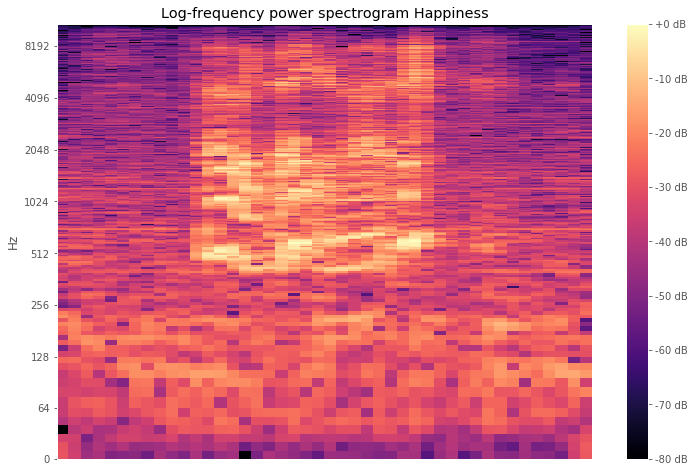

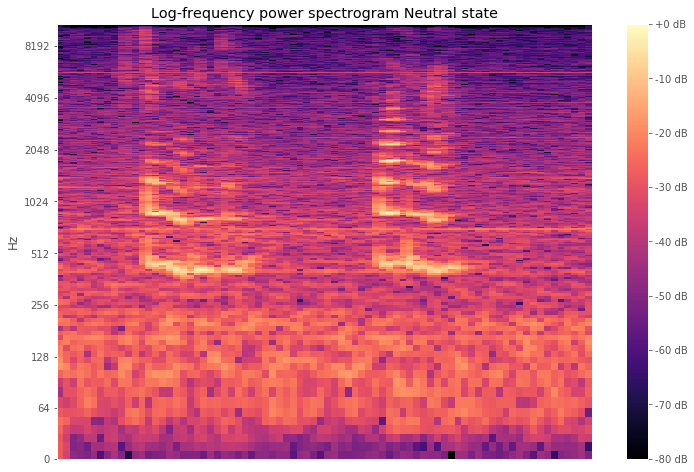

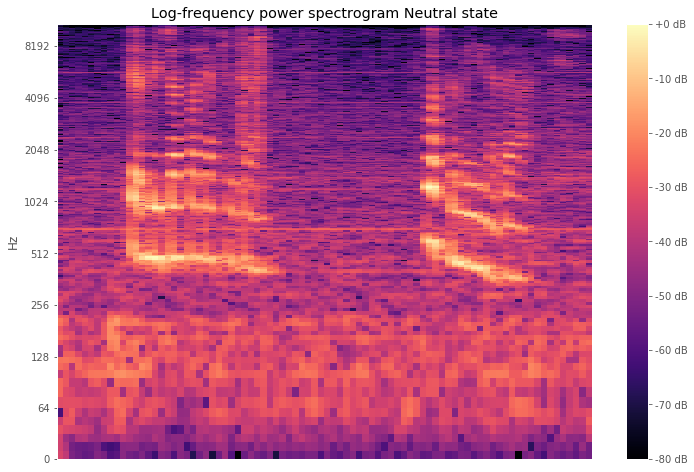

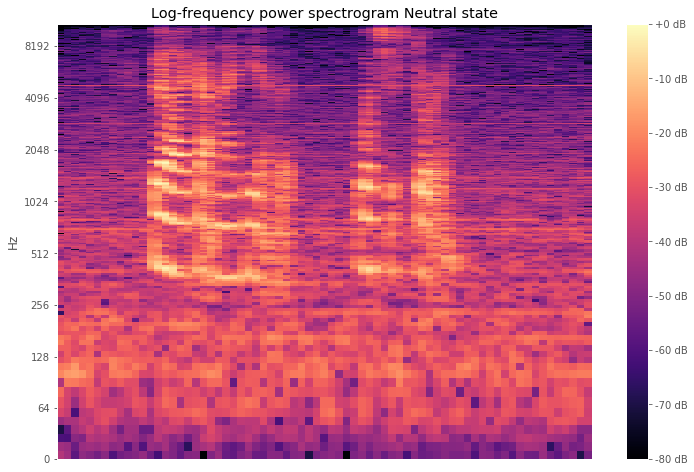

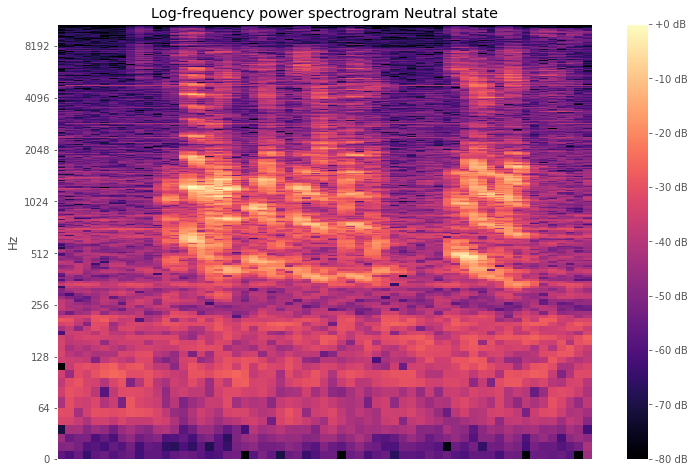

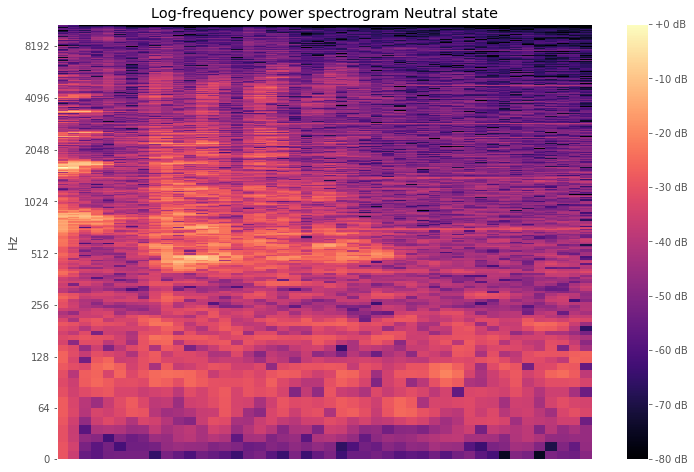

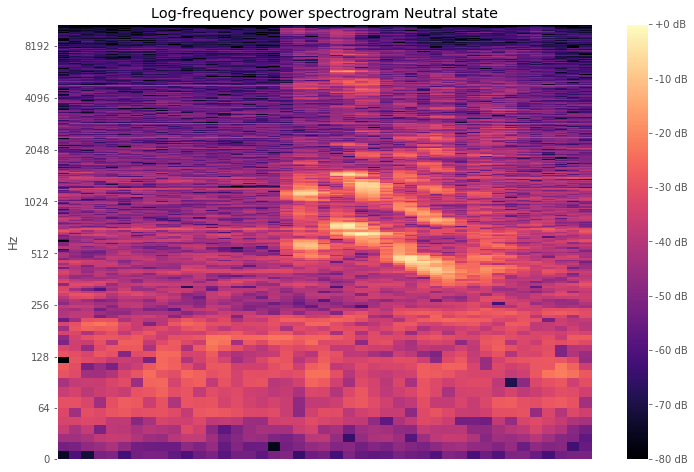

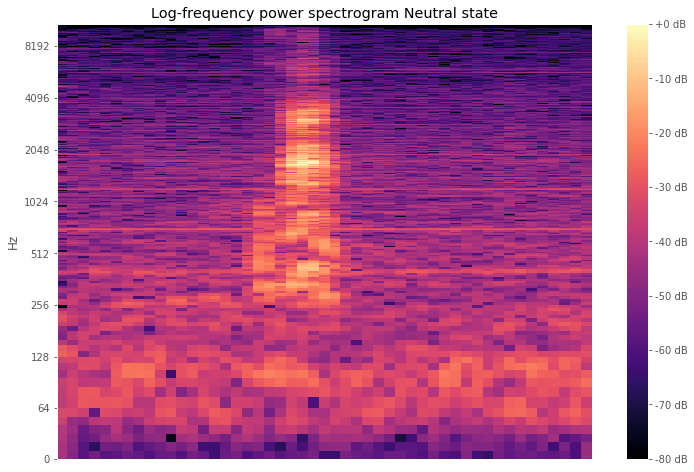

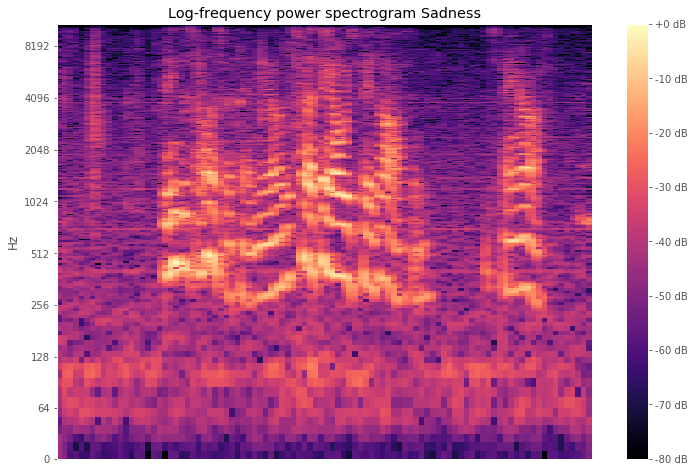

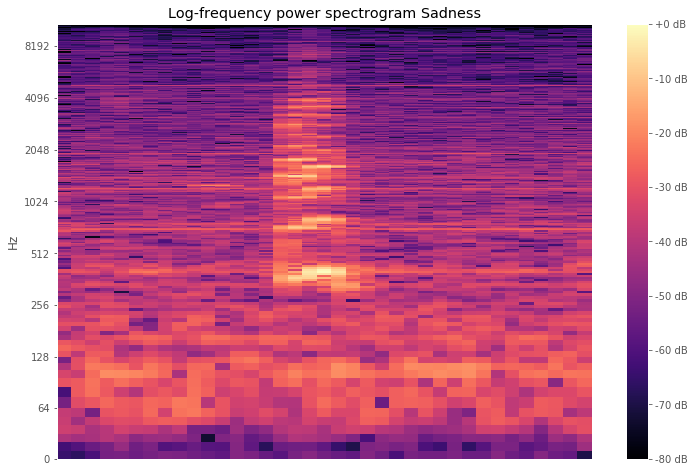

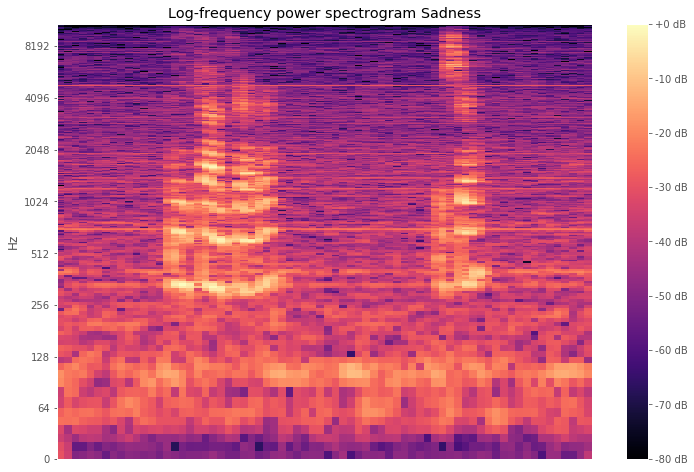

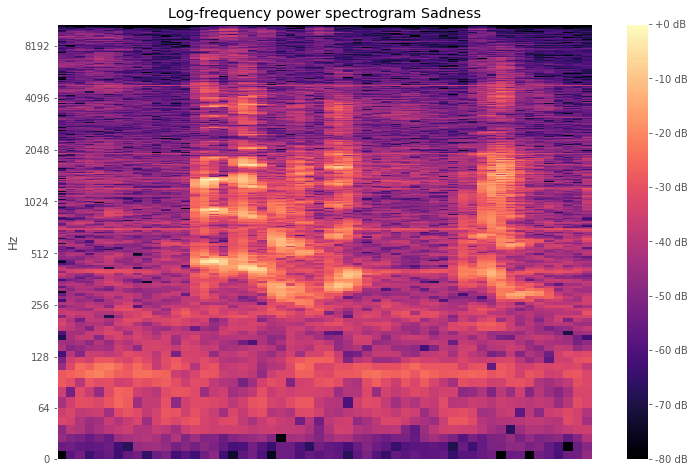

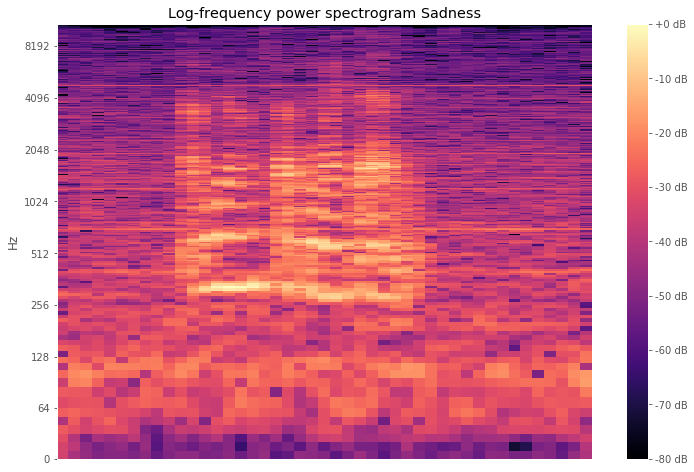

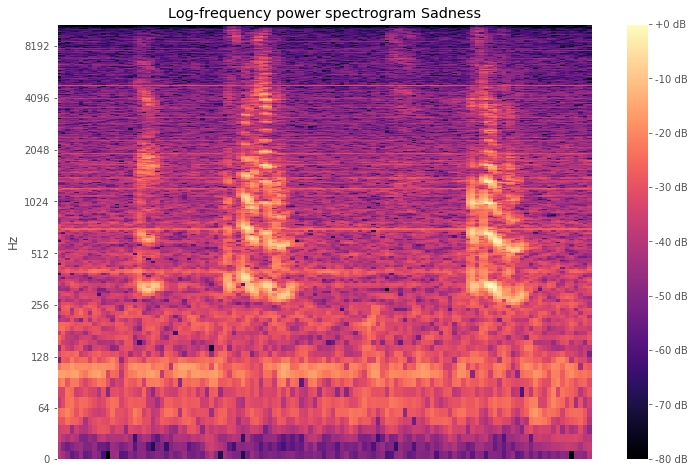

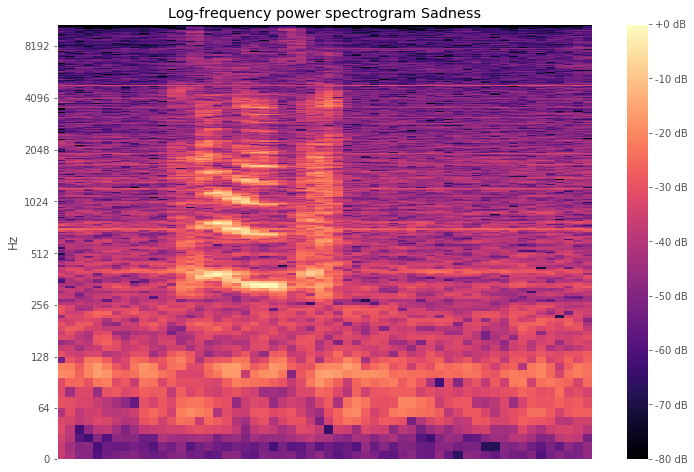

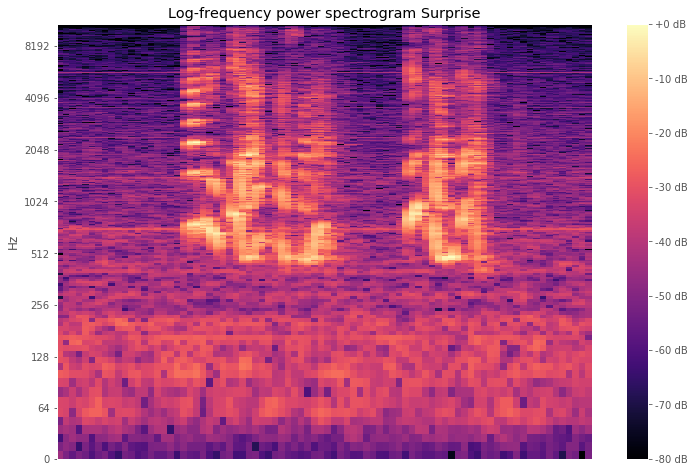

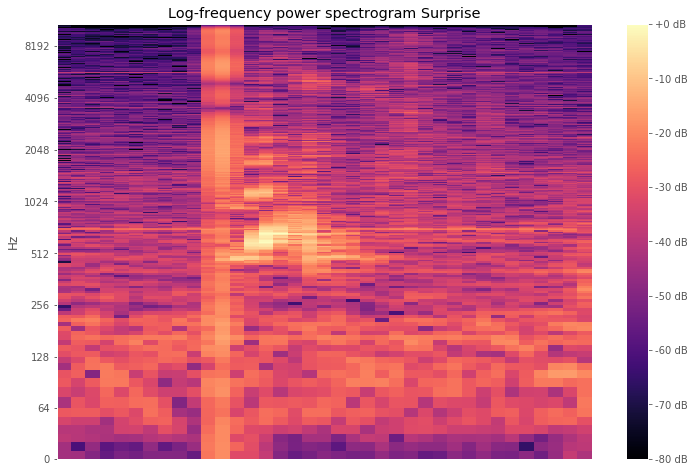

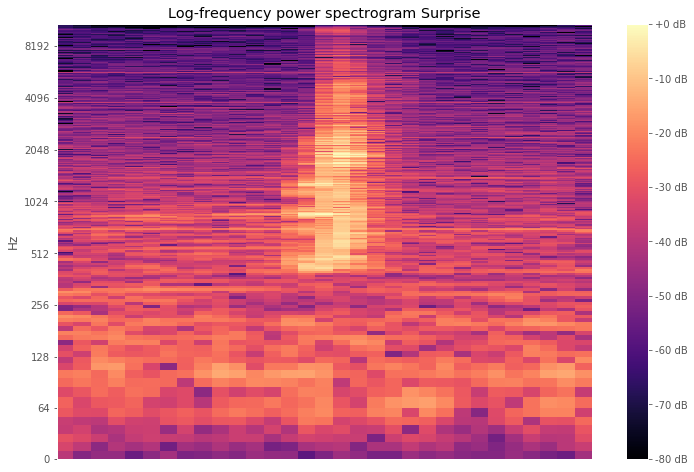

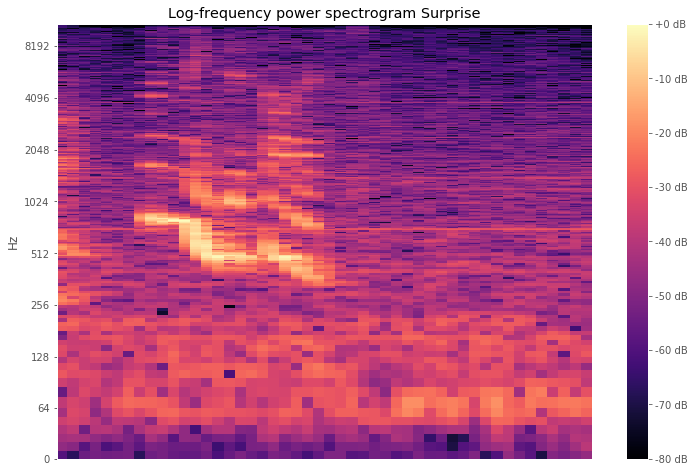

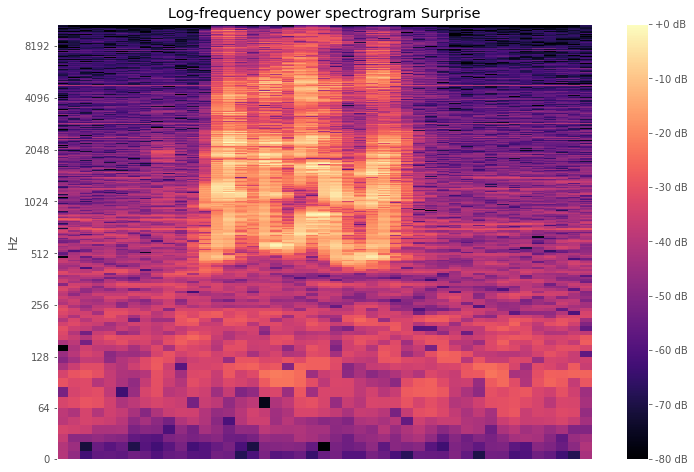

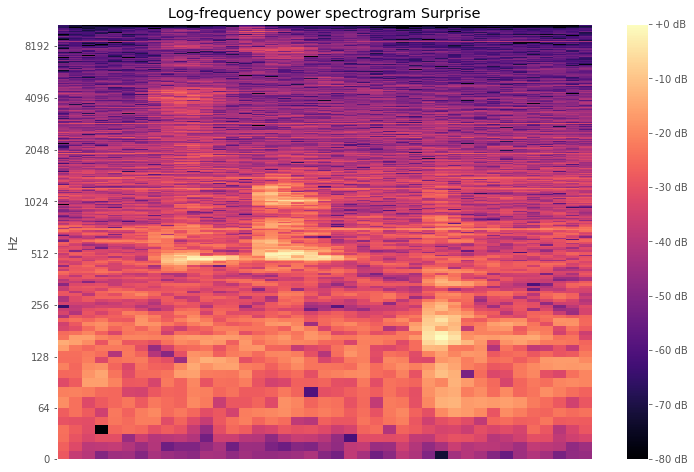

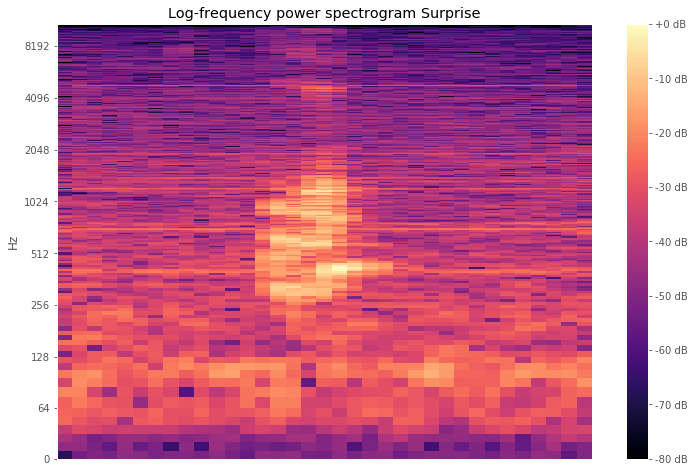

In [8]:
for m, (name, group) in enumerate(x_y_last_grp):
    for n, (index, series) in enumerate(group.iterrows()):
        plot_spec(series.sigs.ravel(),plot_num = 10*m+n, emotion=name)
        

In [29]:
def feature_proximity_tsne(df, col, groupby):
    mfcc_first = np.array(df.loc[:,col].values)

    mfcc_first_min = min([ m_f.shape[1] for m_f in mfcc_first])
    print(mfcc_first_min)
    pca_analysis = PCA(n_components=mfcc_first_min)
    mfcc_pca = []
    for m_f in mfcc_first:
        m_p = pca_analysis.fit_transform(m_f)
        mfcc_pca.append(m_p.ravel())
    mfcc_pca = np.array(mfcc_pca)
    print(mfcc_pca.shape)
    #plt.imshow(mfcc_pca)
    model = TSNE(n_components=2, random_state=0,n_iter=200)
    mfcc_tsne = model.fit_transform(mfcc_pca)
    mfcc_tsne = (mfcc_tsne - mfcc_tsne.mean()) / mfcc_tsne.std()
    #print(mfcc_tsne)
    
    df.loc[:,"tsne_x"] = mfcc_tsne[:,0]
    df.loc[:,"tsne_y"] = mfcc_tsne[:,1]
    
    df_grp = df.groupby(by=groupby)
    fig, ax = plt.subplots(figsize=[16,6])

    for c, (name, group) in enumerate(df_grp):
        ax.scatter(x=group.loc[:,"tsne_x"].values, y=group.loc[:,"tsne_y"].values, c=color_codes[c], label=name)
    ax.legend()
    
def feature_proximity_pc(df, col, groupby):
    mfcc_first = np.array(df.loc[:,col].values)
    
    mfcc_first_min = min([ m_f.shape[1] for m_f in mfcc_first])
    print(mfcc_first_min)
    pca_analysis = PCA(n_components=mfcc_first_min)
    mfcc_pca = []
    for m_f in mfcc_first:
        m_p = pca_analysis.fit_transform(m_f)
        mfcc_pca.append(m_p.ravel())
    mfcc_pca = np.array(mfcc_pca)
    print(mfcc_pca.shape)
    #plt.imshow(mfcc_pca)
    model = TSNE(n_components=2, random_state=0,n_iter=2000)
    mfcc_tsne = model.fit_transform(mfcc_pca)
    mfcc_tsne = (mfcc_tsne - mfcc_tsne.mean()) / mfcc_tsne.std()
    #print(mfcc_tsne)
    
    df.loc[:,"tsne_x"] = mfcc_tsne[:,0]
    df.loc[:,"tsne_y"] = mfcc_tsne[:,1]
    df = df.loc[:,["tsne_x", "tsne_y", "emotion"]]
    fig, ax = plt.subplots(figsize=[16,6])

    parallel_coordinates(df, class_column="emotion")


22
(7, 400)
22
(7, 1)


/home/ritesh_malaiya/anaconda3/envs/p3/lib/python3.6/site-packages/sklearn/decomposition/pca.py:398: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


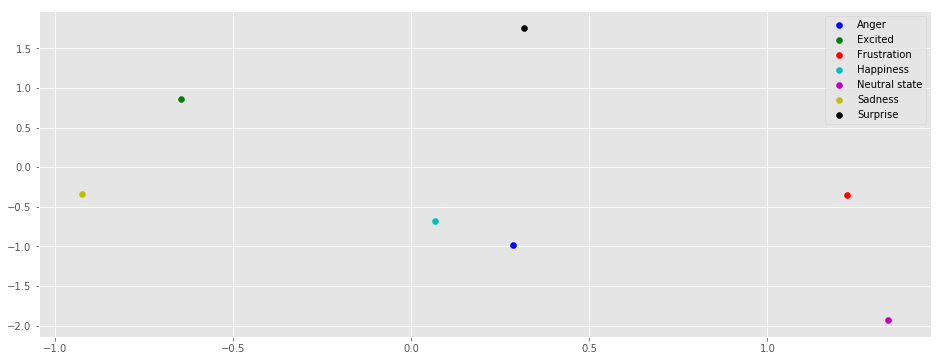

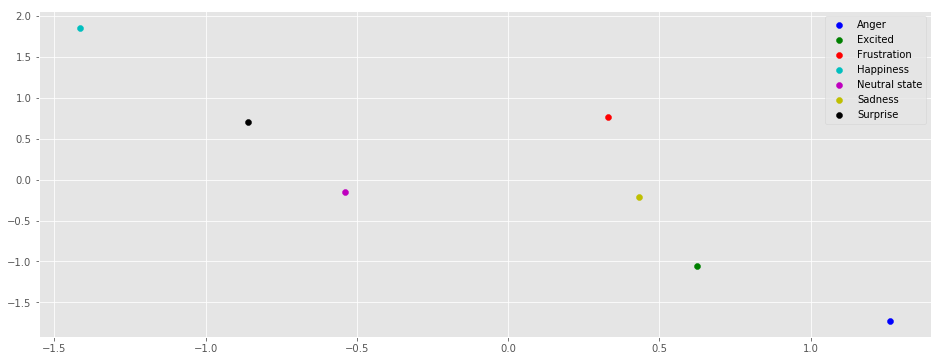

In [30]:
feature_proximity_tsne(x_y_first_hand_crafted, "mfcc", "emotion")
feature_proximity_tsne(x_y_first_hand_crafted, "spectral_bw", "emotion")

22
(49, 400)
22


/home/ritesh_malaiya/anaconda3/envs/p3/lib/python3.6/site-packages/sklearn/decomposition/pca.py:398: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


(49, 1)


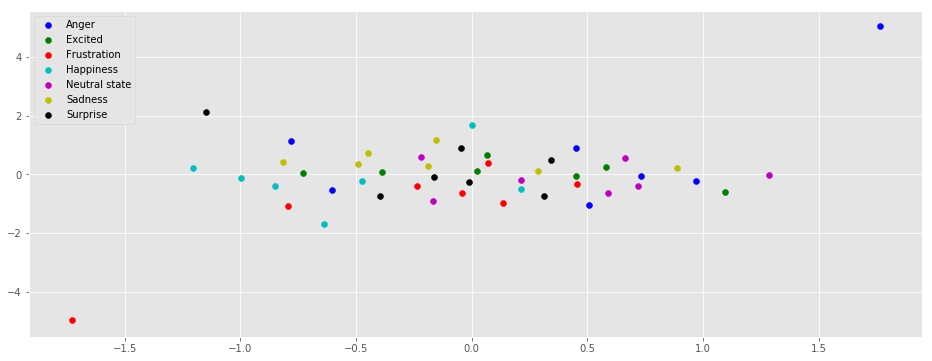

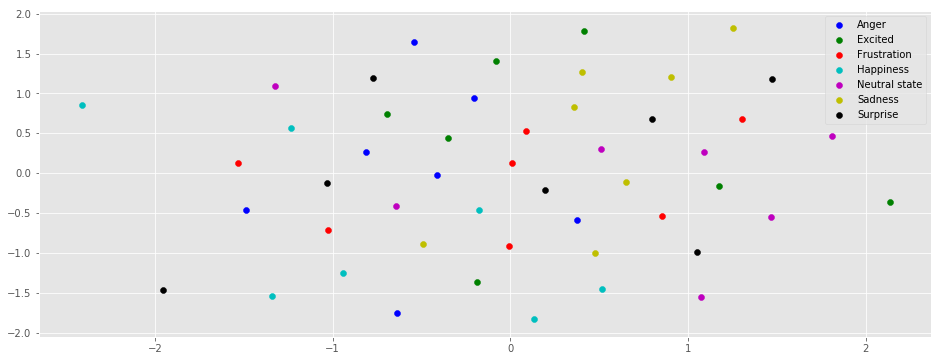

In [16]:
feature_proximity_tsne(x_y_sample_hand_crafted, "mfcc", "emotion")
feature_proximity_tsne(x_y_sample_hand_crafted, "spectral_bw", "emotion")

22
(7, 400)
22
(7, 1)


/home/ritesh_malaiya/anaconda3/envs/p3/lib/python3.6/site-packages/sklearn/decomposition/pca.py:398: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


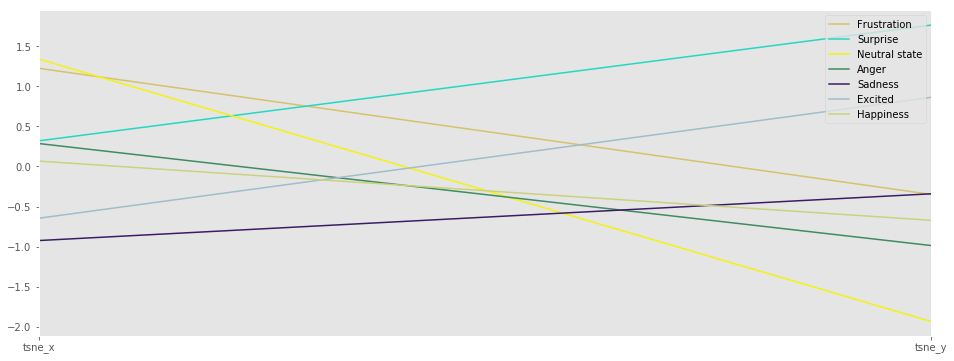

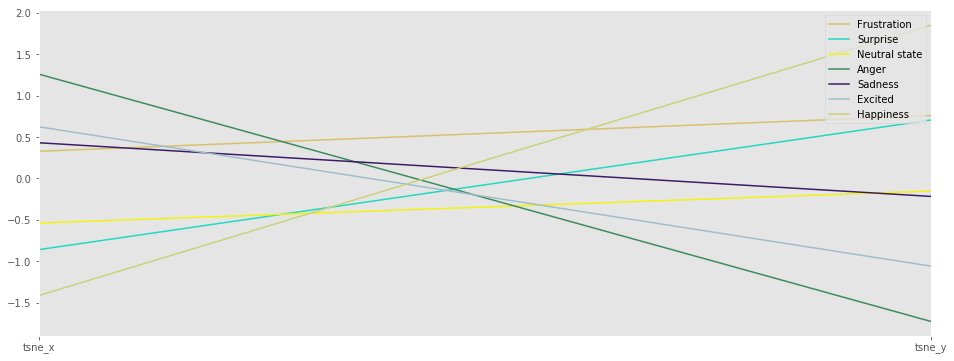

In [20]:
feature_proximity_pc(x_y_first_hand_crafted, "mfcc", "emotion")
feature_proximity_pc(x_y_first_hand_crafted, "spectral_bw", "emotion")

22
(49, 400)
22
(49, 1)


/home/ritesh_malaiya/anaconda3/envs/p3/lib/python3.6/site-packages/sklearn/decomposition/pca.py:398: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


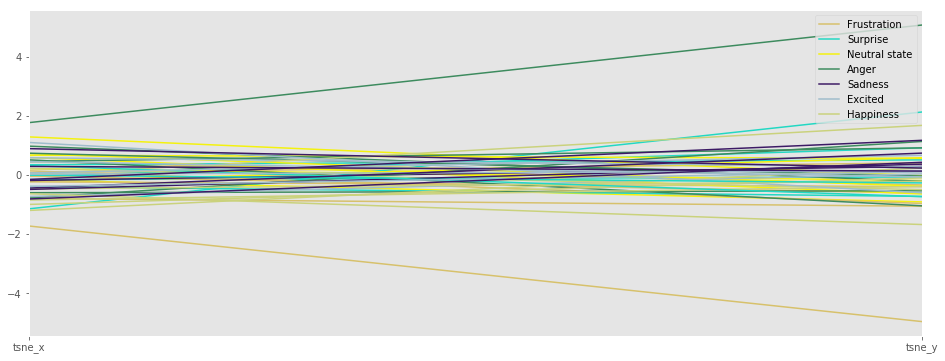

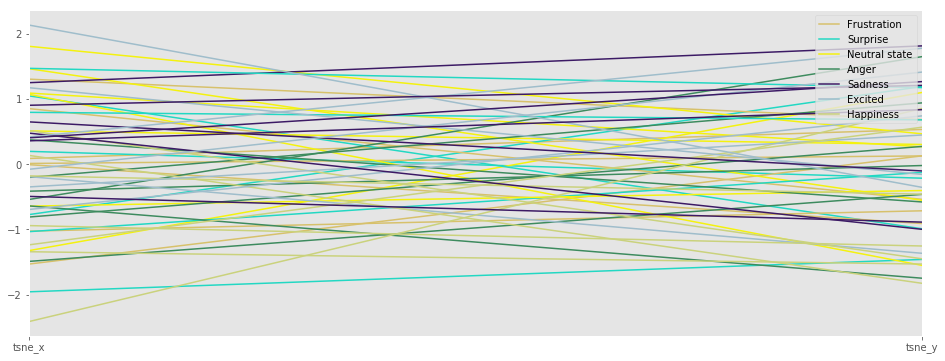

In [22]:
feature_proximity_pc(x_y_sample_hand_crafted, "mfcc", "emotion")
feature_proximity_pc(x_y_sample_hand_crafted, "spectral_bw", "emotion")

1
(49, 61)


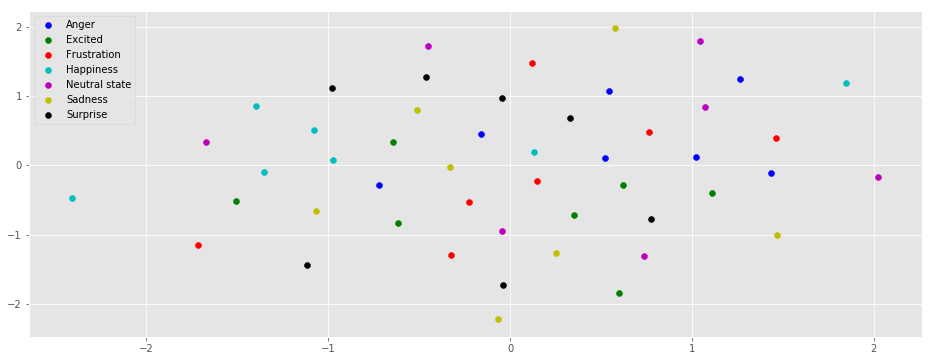

In [34]:
#feature_proximity_tsne(x_y_sample_network_learned, "state_h", "emotion")
feature_proximity_tsne(x_y_sample_network_learned, "state_c", "emotion")

1
(49, 61)


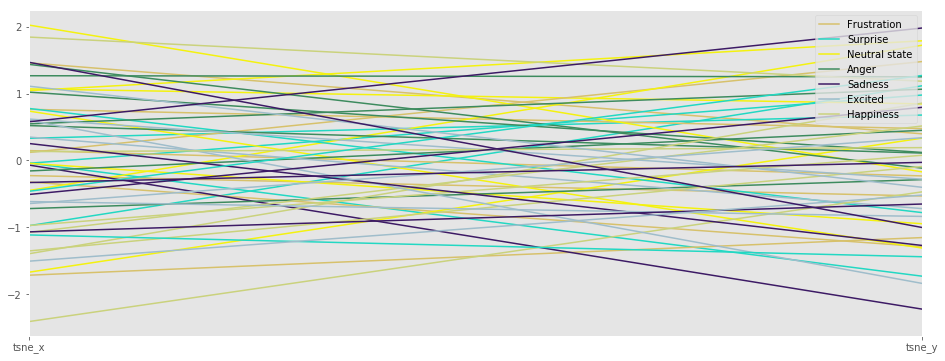

In [35]:
#feature_proximity_pc(x_y_sample_network_learned, "state_h", "emotion")
feature_proximity_pc(x_y_sample_network_learned, "state_c", "emotion")